# End-to-End Machine Learning Project

Task is to predict median house values in Californian districts. 

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.model_selection import train_test_split

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [2]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


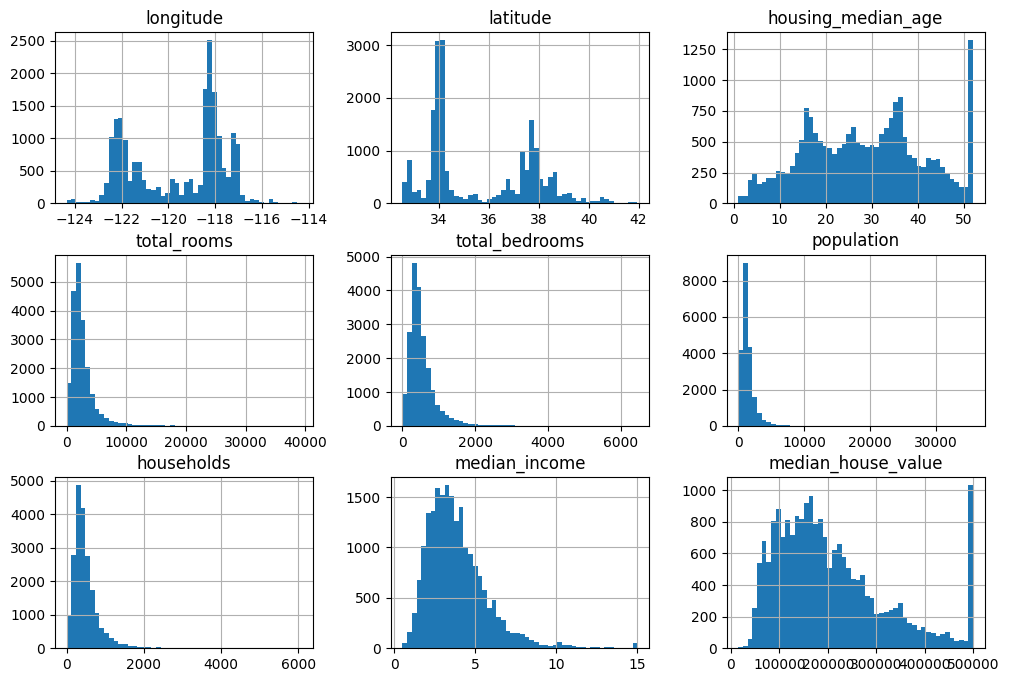

In [6]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()

In [7]:
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio) # number of test elements
    test_indices = shuffled_indices[:test_set_size] # first x elements from shuffled
    train_indices = shuffled_indices[test_set_size:] # remaining N-x elements
    return data.iloc[train_indices], data.iloc[test_indices] # uses masks to return (clever)

# train_set, test_set = shuffle_and_split_data(housing, 0.2)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [8]:
train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.565121,35.631252,28.592720,2635.515928,538.923420,1428.123123,500.259993,3.863585,206111.152980
std,1.999323,2.133670,12.618367,2142.925654,418.202807,1134.043862,379.273307,1.907402,114790.075691
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.780000,33.940000,18.000000,1454.750000,296.000000,788.000000,280.000000,2.561150,119400.000000
50%,-118.490000,34.250000,29.000000,2129.000000,437.000000,1169.000000,411.000000,3.524600,179200.000000
75%,-118.010000,37.720000,37.000000,3152.250000,648.000000,1726.000000,606.000000,4.727000,263800.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


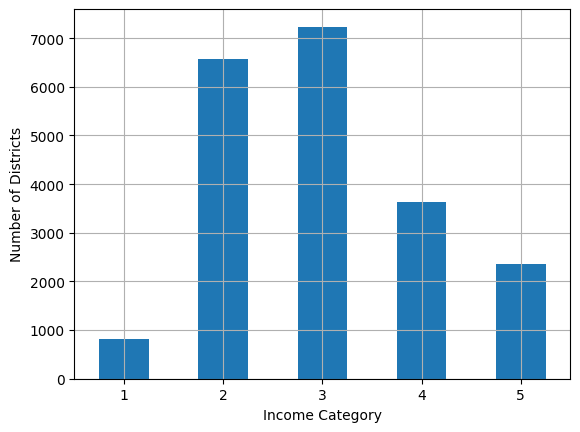

In [9]:
# Might be necessary to correctly represent income in training and test sets

housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1,2,3,4,5]
)

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of Districts")
plt.show()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

## OR

strat_train_set, strat_test_set = train_test_split(
    housing,
    test_size=0.2,
    stratify=housing["income_cat"],
    random_state=42
)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN,5
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN,4
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN,3
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN,3
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY,3


In [11]:
# probably won't need income categories after this point

strat_train_set.drop("income_cat", axis=1, inplace=True)
print(strat_test_set.head()) #drop("income_cat", axis=1, inplace=True)
strat_test_set.drop("income_cat", axis=1, inplace=True)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3905     -121.95     37.11                21.0       2387.0           357.0   
16821    -118.01     33.89                36.0       1589.0           265.0   
2900     -118.18     33.74                30.0       5915.0          1750.0   
7193     -122.48     37.74                52.0       2166.0           423.0   
13928    -122.39     37.78                 5.0       1405.0           515.0   

       population  households  median_income  median_house_value  \
3905        913.0       341.0         7.7360            397700.0   
16821       804.0       272.0         4.6354            202900.0   
2900       2136.0      1503.0         4.0968            310000.0   
7193       1072.0       370.0         4.1310            314300.0   
13928       725.0       392.0         3.6037            187500.0   

      ocean_proximity income_cat  
3905        <1H OCEAN          5  
16821       <1H OCEAN          4  
2900       

In [12]:
# copy set to explore with
explore = strat_train_set.copy()
explore.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN


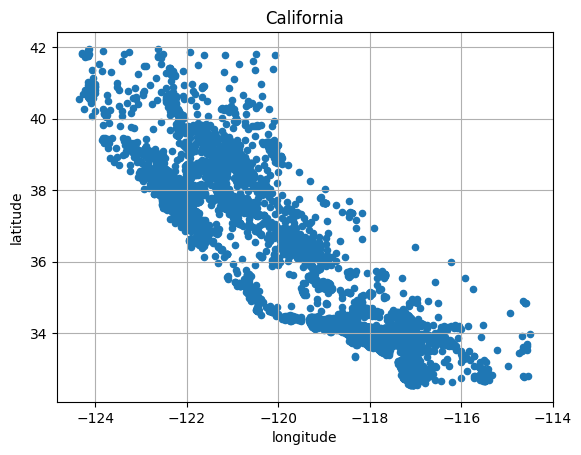

In [13]:
# Which state is this?
explore.plot(
    kind="scatter",
    title="California",
    x="longitude",
    y="latitude",
    grid=True
)
plt.show()

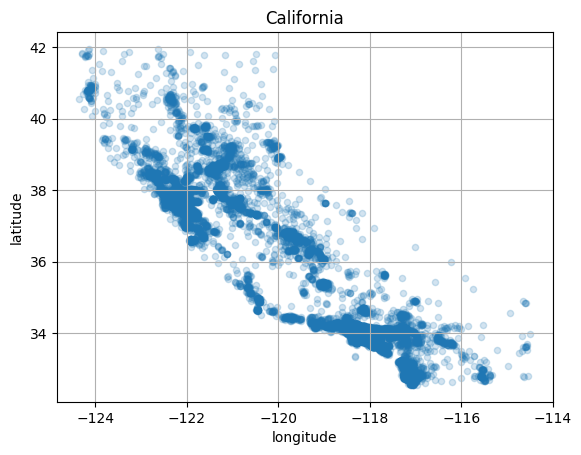

In [14]:
# Use `alpha` parameter to visualize density
explore.plot(
    kind="scatter",
    title="California",
    x="longitude",
    y="latitude",
    grid=True,
    alpha=0.2,
)
plt.show()

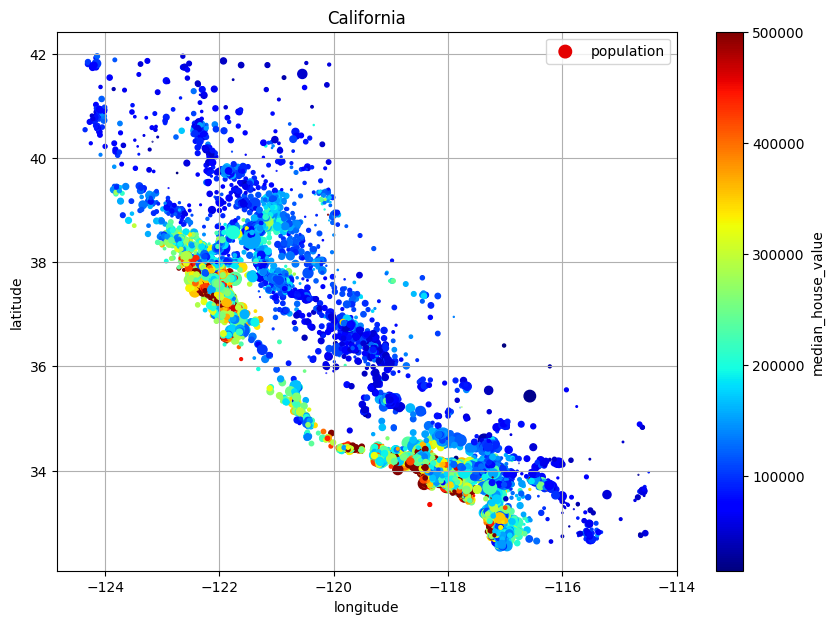

In [15]:
# Include option `s` for population and color for price!
explore.plot(
    kind="scatter",
    title="California",
    x="longitude",
    y="latitude",
    s=explore["population"] / 100,
    label="population",
    c="median_house_value",
    cmap="jet",
    colorbar=True,
    legend=True,
    sharex=False,
    figsize=(10,7),
    grid=True,
    # alpha=0.2,
)
plt.show()

## Correlations

smaller dataset means easy to look at all correlations

In [16]:
# corr_matrix = explore.corr()
corr_matrix = explore.drop("ocean_proximity", axis=1).corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


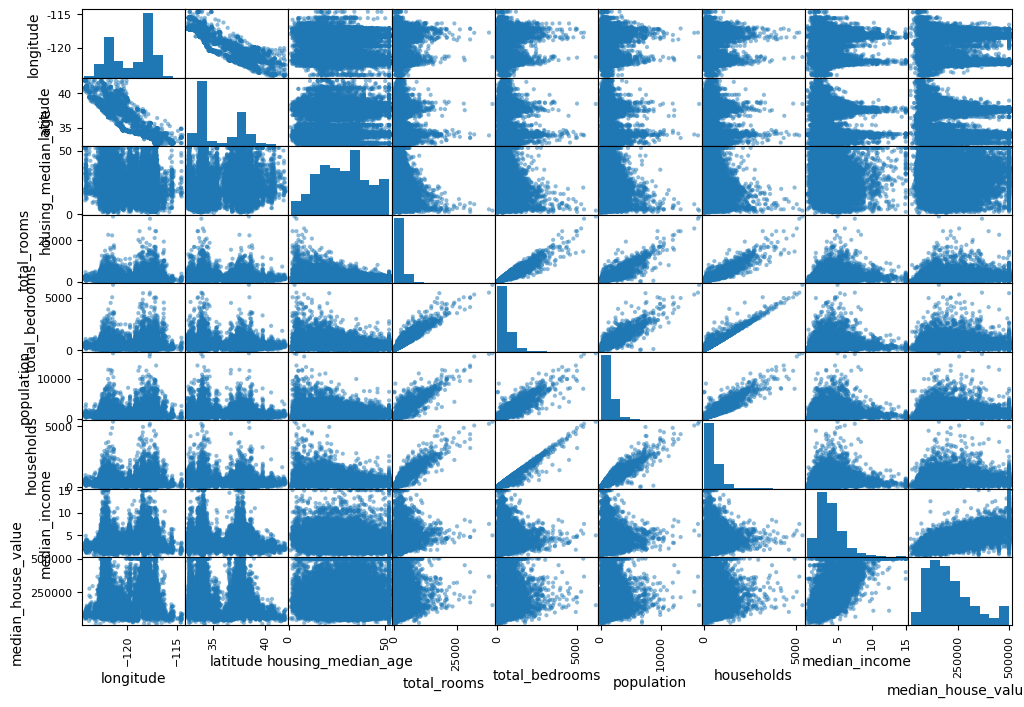

In [17]:
attributes = explore.drop("ocean_proximity", axis=1).columns
pd.plotting.scatter_matrix(explore[attributes], figsize=(12, 8))
plt.show()

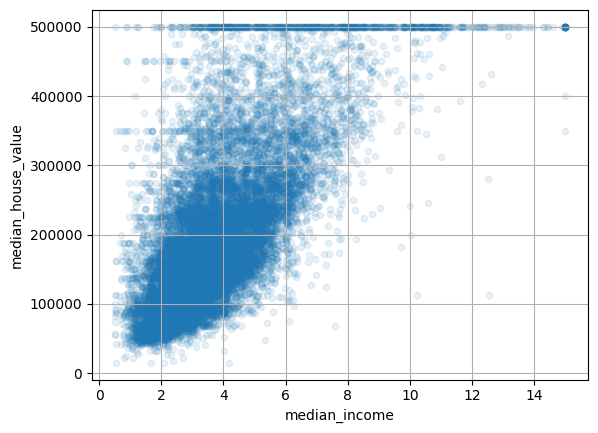

In [18]:
explore.plot(
    kind="scatter",
    x="median_income",
    y="median_house_value",
    alpha=0.1,
    grid=True,
)
plt.show()

In [19]:
# Some variables are correlated
explore["rooms_per_house"] = explore["total_rooms"] / explore["households"]
explore["bedrooms_ratio"] = explore["total_bedrooms"] / explore["total_rooms"]
explore["people_per_house"] = explore.population / explore.households

corr_matrix = explore.drop("ocean_proximity", axis=1).corr()
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

## Data Processing

We will clean data now that we have some insights. 

In [20]:
housing = strat_train_set.drop("median_house_value", axis=1) # if not inplace, it return a dataframe
housing_labels = strat_train_set["median_house_value"].copy()
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND


In [21]:
# housing.dropna(subset=["total_bedrooms"], inplace=True)
# housing.drop("total_bedrooms", axis=1)

# median = housing.total_bedrooms.median()
# housing.total_bedrooms.fillna(median, inplace=True)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.select_dtypes(include=[np.number]) # only numerical types
imputer.fit(housing_num) # fit imputer on training data
print(imputer.statistics_)  # stores medians here
print(housing_num.median().values)

[-118.51     34.26     29.     2125.      434.     1167.      408.
    3.5385]
[-118.51     34.26     29.     2125.      434.     1167.      408.
    3.5385]


In [22]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330


In [23]:
housing_cat = housing[["ocean_proximity"]] # meow
housing_cat.head(5)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN


In [24]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
print(ordinal_encoder.categories_) # gives list of categorical attributes

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat).toarray()
print(cat_encoder.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [25]:
print(cat_encoder.feature_names_in_)
print(cat_encoder.get_feature_names_out())

['ocean_proximity']
['ocean_proximity_<1H OCEAN' 'ocean_proximity_INLAND'
 'ocean_proximity_ISLAND' 'ocean_proximity_NEAR BAY'
 'ocean_proximity_NEAR OCEAN']


In [26]:
from sklearn.preprocessing import MinMaxScaler

min_max_scalar = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scalar.fit_transform(housing_num)
print(housing_num_min_max_scaled)

[[-0.60851927  0.11702128  1.         ... -0.80701754 -0.61433638
  -0.7794789 ]
 [ 0.21095335 -0.66170213  0.52941176 ... -0.91866029 -0.86708979
  -0.22929339]
 [-0.51926978  0.23617021  0.25490196 ... -0.93141946 -0.92458466
  -0.73336919]
 ...
 [ 0.47870183 -0.99148936 -0.52941176 ... -0.65513434 -0.71663244
  -0.50873781]
 [ 0.20689655 -0.6787234   0.41176471 ... -0.78873758 -0.68751167
  -0.49716556]
 [-0.60649087  0.08723404  0.68627451 ... -0.91669734 -0.92122457
  -0.61608805]]


In [27]:
from sklearn.preprocessing import StandardScaler

std_scalar = StandardScaler()
housing_num_std_scaled = std_scalar.fit_transform(housing_num)
print(housing_num_std_scaled)

[[-1.42303652  1.0136059   1.86111875 ...  0.13746004  1.39481249
  -0.93649149]
 [ 0.59639445 -0.702103    0.90762971 ... -0.69377062 -0.37348471
   1.17194198]
 [-1.2030985   1.27611874  0.35142777 ... -0.78876841 -0.77572662
  -0.75978881]
 ...
 [ 1.25620853 -1.42870103 -1.23772062 ...  1.26829911  0.67913534
   0.1010487 ]
 [ 0.58639727 -0.73960483  0.66925745 ...  0.27356264  0.88286825
   0.14539615]
 [-1.41803793  0.94797769  1.22545939 ... -0.67915557 -0.75221898
  -0.31034135]]


In [28]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]],[[35]], gamma=0.1)
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [29]:
from sklearn.linear_model import LinearRegression

target_scalar = StandardScaler()
scaled_labels = target_scalar.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels) # simple regression?
some_new_data = strat_test_set[["median_income"]].iloc[:5].copy() # pretend it is new data

scaled_predictions = model.predict(some_new_data)

# Showing how we can inverse transform our model
predictions = target_scalar.inverse_transform(scaled_predictions)
predictions

array([[368521.24764991],
       [238429.42911631],
       [215831.39858602],
       [217266.32737202],
       [195142.41073886]])

In [30]:
# -- OR --
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(
    LinearRegression(),
    transformer=StandardScaler(),
)

model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)
predictions

array([368521.24764991, 238429.42911631, 215831.39858602, 217266.32737202,
       195142.41073886])

In [31]:
# Custom Transforms
from sklearn.preprocessing import FunctionTransformer

# provide both forwards and backwards functions
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [32]:
rbf_tranformer = FunctionTransformer(
    rbf_kernel,
    kw_args=dict(Y=[[35.]], gamma=0.1)
)
age_simil_35 = rbf_tranformer.transform(housing[["housing_median_age"]])
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [33]:
# Custom tranformer to act like StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean = with_mean

    def fit(self, X, y=None):
        X = check_array(X)
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]
        return self
    
    def transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [36]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None) -> None:
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self
    
    def transform(self, X):
        return rbf_kernel(
            X,
            self.kmeans_.cluster_centers_,
            gamma=self.gamma,
        )
    
    def get_feature_names_out(self, names=None):
        return [
            f"Cluster {i} similarity" for i in range(self.n_clusters)
        ]

In [37]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(
    housing[['latitude', 'longitude']],
    sample_weight=housing_labels
)
similarities

/home/ksull18/code/1990-cal-housing-ml/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[7.90165632e-02, 4.29901164e-14, 6.03972145e-01, ...,
        1.98273138e-03, 6.66241631e-17, 1.40931619e-01],
       [5.82488504e-14, 9.90046143e-01, 1.62296800e-10, ...,
        2.99695991e-26, 6.32121447e-01, 1.49980122e-09],
       [4.44899714e-01, 1.43260203e-14, 2.98432127e-01, ...,
        1.01045486e-02, 2.87904572e-17, 2.88731307e-01],
       ...,
       [2.14229240e-25, 2.34767544e-02, 1.27755043e-20, ...,
        1.36785104e-41, 1.24070781e-01, 2.69295229e-19],
       [3.04522421e-14, 9.94603128e-01, 1.12895602e-10, ...,
        1.35896633e-26, 6.41870993e-01, 9.22745279e-10],
       [5.88813824e-02, 1.30531503e-13, 6.95132975e-01, ...,
        9.77188785e-04, 2.16738176e-16, 1.42368832e-01]])

## Transformation Pipelines

To transform data in the right order

In [39]:
from sklearn.pipeline import Pipeline

num_pipline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("stanardize", StandardScaler()),
])

housing_num_prepared = num_pipline.fit_transform(housing_num)
housing_num_prepared[:3].round(3)

array([[-1.423,  1.014,  1.861,  0.312,  1.368,  0.137,  1.395, -0.936],
       [ 0.596, -0.702,  0.908, -0.309, -0.436, -0.694, -0.373,  1.172],
       [-1.203,  1.276,  0.351, -0.712, -0.761, -0.789, -0.776, -0.76 ]])

In [41]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared,
    columns=num_pipline.get_feature_names_out(),
    index=housing_num.index,
)
df_housing_num_prepared.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365


In [44]:
# One Transformer to rule them all
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline


all_cols = housing.columns
cat_attribs = ["ocean_proximity"]
num_attribs = [x for x in all_cols if x not in cat_attribs]
# print(num_attribs)

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"),
)

preprocessing = ColumnTransformer([
    ('num', num_pipline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
])

In [45]:
# One Transformer to rule them all
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [46]:
housing_prepared = preprocessing.fit_transform(housing)

In [47]:
# Build pipeline altogether now!
def column_ratio(X):
    return X[:,[0]] / X[:,[1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler(),
    )

log_pipline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler(),
)

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1.0, random_state=42)
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
)

preprocessing = ColumnTransformer(
    [
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline,
)

housing_prepared = preprocessing.fit_transform(housing)
print(housing_prepared.shape)
print(preprocessing.get_feature_names_out())

/home/ksull18/code/1990-cal-housing-ml/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(16512, 24)
['bedrooms__ratio' 'rooms_per_house__ratio' 'people_per_house__ratio'
 'log__total_bedrooms' 'log__total_rooms' 'log__population'
 'log__households' 'log__median_income' 'geo__Cluster 0 similarity'
 'geo__Cluster 1 similarity' 'geo__Cluster 2 similarity'
 'geo__Cluster 3 similarity' 'geo__Cluster 4 similarity'
 'geo__Cluster 5 similarity' 'geo__Cluster 6 similarity'
 'geo__Cluster 7 similarity' 'geo__Cluster 8 similarity'
 'geo__Cluster 9 similarity' 'cat__ocean_proximity_<1H OCEAN'
 'cat__ocean_proximity_INLAND' 'cat__ocean_proximity_ISLAND'
 'cat__ocean_proximity_NEAR BAY' 'cat__ocean_proximity_NEAR OCEAN'
 'remainder__housing_median_age']


## Select and Train!

In [48]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

housing_predictions = lin_reg.predict(housing)
print(housing_predictions[:5].round(-2))
print(housing_labels.iloc[:5].values)

/home/ksull18/code/1990-cal-housing-ml/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[242800. 375900. 127500.  99400. 324600.]
[458300. 483800. 101700.  96100. 361800.]


In [49]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(
    housing_labels,
    housing_predictions,
    squared=False
)
lin_rmse

68647.95686706669

Current model has large error. Either data isn't great or the model isn't powerful enough.

In [50]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(
    preprocessing,
    DecisionTreeRegressor(random_state=42),
)

# Training in progress
tree_reg.fit(housing, housing_labels)

/home/ksull18/code/1990-cal-housing-ml/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7f7...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f74a7ae0890>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [53]:
# Look at results against training data
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(
    housing_labels,
    housing_predictions,
    squared=False
)
tree_rmse

0.0

In [54]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(
    tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10,
)
pd.Series(tree_rmses).describe()

/home/ksull18/code/1990-cal-housing-ml/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ksull18/code/1990-cal-housing-ml/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ksull18/code/1990-cal-housing-ml/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ksull18/code/1990-cal-housing-ml/.venv/lib/python3.12/site-packages/sklearn/

count       10.000000
mean     67153.318273
std       1963.580924
min      63925.253106
25%      66083.277180
50%      66795.829871
75%      68074.018403
max      70664.635833
dtype: float64

In [55]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(
    preprocessing,
    RandomForestRegressor(random_state=42),
)
forest_rmses = -cross_val_score(
    forest_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10
)
pd.Series(forest_rmses).describe()

/home/ksull18/code/1990-cal-housing-ml/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ksull18/code/1990-cal-housing-ml/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ksull18/code/1990-cal-housing-ml/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ksull18/code/1990-cal-housing-ml/.venv/lib/python3.12/site-packages/sklearn/

count       10.000000
mean     47002.931706
std       1048.451340
min      45667.064036
25%      46494.358345
50%      47093.173938
75%      47274.873814
max      49354.705514
dtype: float64

In [56]:
from sklearn.neural_network import MLPRegressor

# mlp_regressor = make_pipeline(
#     preprocessing,
#     MLPRegressor(),
# )
# mlp_rmses = -cross_val_score(
#     mlp_regressor, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=5
# )
# pd.Series(mlp_rmses).describe()

/home/ksull18/code/1990-cal-housing-ml/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ksull18/code/1990-cal-housing-ml/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ksull18/code/1990-cal-housing-ml/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ksull18/code/1990-cal-housing-ml/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:69

count         5.000000
mean     164613.391897
std        2576.695053
min      161095.901500
25%      163765.034327
50%      164413.162646
75%      165671.612567
max      168121.248448
dtype: float64

In [ ]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("random_forest", RandomForestRegressor(random_state=42)),
    ]
)
param_grid = [
    {
        'preprocessing__geo__n_clusters': [5,8,10],
        'random_forest__max_features': [4,6,8],
    },
    {
        'preprocessing__geo__n_clusters': [10,15],
        'random_forest__max_features': [6,8,10],
    },
]
grid_search = GridSearchCV(
    full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error',
)
grid_search.fit(housing, housing_labels)